In [23]:
token = 'FB TOKEN'


In [24]:
import time
import pickle
import random
import facebook
import requests

graph = facebook.GraphAPI(access_token= token)
def some_action(post):
    """ 
    null`
    """
    return post



user = '1608995489343236'

graph = facebook.GraphAPI(token)
profile = graph.get_object(user)
posts = graph.get_connections(profile['id'], 'posts')

data=[]
\
while True:
    try:
       
        time.sleep(random.randint(3,6))
        data.extend(posts['data'])
 
        [some_action(post=post) for post in posts['data']]
     
        posts = requests.get(posts['paging']['next']).json()
    except KeyError:
      
        break


In [25]:
# data
pickle.dump(data,open("ts.pkl","wb"))

In [26]:
loaded_data= pickle.load(file=open('ts.pkl', 'rb'))
loaded_data[0]

{'created_time': '2017-12-06T15:06:46+0000',
 'story': 'ALIII',
 'id': '1608995489343236_1986773708232077'}

In [27]:
import pandas as pd 
import string
from operator import itemgetter

In [28]:
df2 = pd.io.json.json_normalize(data=loaded_data)

In [29]:
df2.tail()

,created_time,id,message,story
32,2015-07-18T11:38:59+0000,1608995489343236_1628820397360745,NaN,ALIII обновил(-а) фото обложки.
33,2015-06-19T17:20:34+0000,1608995489343236_1619047165004735,First 100 Followers and more than 2k plays in ...,NaN
34,2015-06-18T07:36:09+0000,1608995489343236_1618549258387859,Check my new tune!U can download it for free h...,NaN
35,2015-05-27T12:55:05+0000,1608995489343236_1608996239343161,NaN,ALIII обновил(-а) фото обложки.
36,2015-05-27T12:52:14+0000,1608995489343236_1608995792676539,NaN,ALIII обновил(-а) фото профиля.


In [30]:
df2.columns

Index(['created_time', 'id', 'message', 'story'], dtype='object')

In [31]:
df2.rename(columns = {'created_time': 'createdtime'},inplace=True)

In [32]:
df2.fillna('', inplace=True)

In [33]:
latest_news = df2.sort_values('createdtime', ascending=False)

In [34]:
latest_news_id = latest_news["id"]
#latest_news_id

In [35]:
for i,x in latest_news_id.iteritems():
    print('https://www.facebook.com/' + x)

https://www.facebook.com/1608995489343236_1986773708232077
https://www.facebook.com/1608995489343236_1969346086641506
https://www.facebook.com/1608995489343236_1949165658659549
https://www.facebook.com/1608995489343236_1922718701304245
https://www.facebook.com/1608995489343236_1921876238055158
https://www.facebook.com/1608995489343236_1916377831938332
https://www.facebook.com/1608995489343236_1914567182119397
https://www.facebook.com/1608995489343236_1893461637563285
https://www.facebook.com/1608995489343236_1856673694575413
https://www.facebook.com/1608995489343236_1837448996497883
https://www.facebook.com/1608995489343236_1814968855412564
https://www.facebook.com/1608995489343236_1813674188875364
https://www.facebook.com/1608995489343236_1811655422410574
https://www.facebook.com/1608995489343236_1783705365205580
https://www.facebook.com/1608995489343236_1783705138538936
https://www.facebook.com/1608995489343236_1777815305794586
https://www.facebook.com/1608995489343236_17775494524878

In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def count_words(df):
    mapping = dict.fromkeys(map(ord, string.punctuation))
    stop_words=["a","about","above","after","again","against","all","am","an","and","any",
                "are","now","aren't","as","at","be","because","been","before","being","below",
                "between","both","but","by","can't","cannot","could","couldn't","did","didn't",
                "do","does","doesn't","doing","don't","down","due","during","each","few","for","from",
                "further","had","hadn't","has","hasn't","have","haven't","having","he","he'd",
                "he'll","he's","her","here","here's","hers","herself","him","himself","his","how",
                "how's","i","i'd","i'll","i'm","i've","if","in","into","is","isn't","it","it's",
                "its","itself","let's","me","more","most","mustn't","my","myself","no","nor","not",
                "of","off","on","once","only","or","other","ought","our","ours","ourselves","out",
                "over","own","same","shan't","she","she'd","she'll","she's","should","shouldn't","so",
                "some","such","than","that","that's","the","their","theirs","them","themselves","then",
                "there","there's","these","they","they'd","they'll","they're","they've","this","those",
                "through","to","too","under","until","up","very","was","wasn't","we","we'd","we'll",
                "we're","we've","were","weren't","what","what's","when","when's","where","where's",
                "which","while","who","who's","whom","why","why's","with","won't","would","wouldn't",
                "you","you'd","you'll","you're","you've","your",'guys','just','day',"yours","yourself",
                "yourselves","will","ana","isa","can","hwa","wala","msh","wla","hya","will",'enta','7aga',
                'mesh','dah','bas','elly','b2a','3ala','alf','enty','3al',]
    space = [' ']
    words = {}
    
    for m in df2['message']:
        try:
            seperated_words = m.split(' ')
        except:
            pass
        for word in seperated_words:
            word = word.strip()
            word = word.lower()
            #remove any punctuation
            word = word.translate(mapping)
            if word in stop_words:
                continue
            if word in space:
                continue
            if len(word)<3:
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    print("done counting words")
    return words

In [38]:
words = count_words(df2)
# words

done counting words


In [39]:
words_df = pd.DataFrame(list(words.items()), columns=['word','count'])
words_df.sort_values('count', ascending=False, inplace=True)
words_df.head(20)

,word,count
3,aliii,2
10,download,2
19,followers,2
40,plays,2
42,new,2
0,brooklyn,1
41,mmm\nhttpssoundcloudcom3000bassaliiibadfreedow...,1
31,httpssoundcloudcomiamaliiiarfmwip,1
32,melodic,1
33,tunes,1


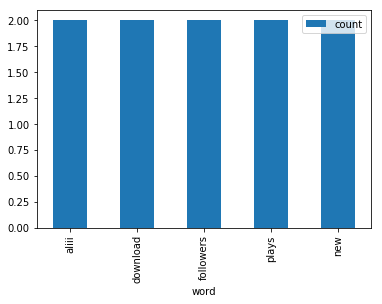

In [47]:
%matplotlib inline
words_df[words_df['count']>1].plot(x = 'word', kind = "bar")